In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import preprocessing
from scipy.io import arff
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
T_SIZE = 0.10

In [3]:
df = pd.read_csv('../dataset/divorce.csv',sep=';')
df_col = df.columns

In [4]:
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


### Preprocessing

In [5]:
total = df.isnull().sum().sort_values(ascending=False)

In [6]:
x = df.values #returns a numpy array
print(x)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = df_col)
df

[[2 2 4 ... 2 1 1]
 [4 4 4 ... 2 2 1]
 [2 2 2 ... 2 2 1]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 3 1 0]
 [0 0 0 ... 3 1 0]]


,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,0.50,0.50,1.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,...,0.50,0.25,0.75,0.75,0.75,0.50,0.75,0.50,0.25,1.0
1,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,...,0.50,0.50,0.75,1.00,1.00,1.00,1.00,0.50,0.50,1.0
2,0.50,0.50,0.50,0.50,0.25,0.75,0.50,0.25,0.25,0.50,...,0.75,0.50,0.75,0.25,0.25,0.25,0.50,0.50,0.50,1.0
3,0.75,0.50,0.75,0.50,0.75,0.75,0.75,0.75,0.75,0.75,...,0.50,0.50,0.75,0.75,0.75,0.75,0.50,0.50,0.50,1.0
4,0.50,0.50,0.25,0.25,0.25,0.25,0.00,0.00,0.00,0.00,...,0.50,0.25,0.50,0.75,0.50,0.50,0.50,0.25,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.25,0.00,1.00,0.25,0.25,1.00,0.50,0.50,0.50,0.0
166,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.25,0.50,0.50,0.50,0.50,0.75,0.50,0.50,0.0
167,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,...,0.75,0.00,0.50,0.00,0.25,0.25,0.75,0.00,0.00,0.0
168,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.75,0.75,0.50,0.50,0.75,0.50,1.00,0.75,0.25,0.0


### Selección de caracteristicas
We can select the important features and observe how much a feature is effecting ourprediction.For this,we use the pearson correlation matrix.

<AxesSubplot:>

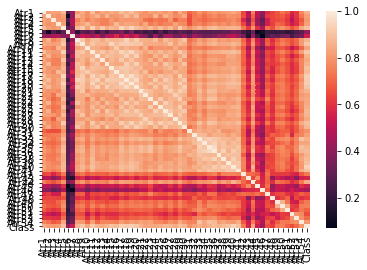

In [7]:
# load the R package ISLR
# load the Auto dataset
auto_df = df
# calculate the correlation matrix
corr = auto_df.corr()
# plot the heatmap
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

### Los números más grandes significan más correlación, independientemente del signo.

In [8]:
corr

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
Atr1,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,...,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
Atr2,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,...,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
Atr3,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,...,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
Atr4,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,...,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
Atr5,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,...,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
Atr6,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,...,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
Atr7,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,...,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,0.544835
Atr8,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,...,0.433541,0.675584,0.588531,0.674776,0.729668,0.690190,0.658613,0.705071,0.807911,0.869569
Atr9,0.845916,0.827711,0.816653,0.829053,0.916327,0.301342,0.517522,0.915301,1.000000,0.852385,...,0.434318,0.693839,0.611726,0.711503,0.755509,0.713750,0.652376,0.699211,0.810977,0.912368
Atr10,0.790183,0.782286,0.753017,0.873636,0.823659,0.266076,0.498266,0.828031,0.852385,1.000000,...,0.342315,0.559998,0.550313,0.659604,0.672236,0.618666,0.513842,0.592641,0.698528,0.834897


### Store the predicting class into another variable and drop it from the Table

In [9]:
y= df['Class']
X=df.drop('Class',axis=1)
X.shape

(170, 54)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=T_SIZE, random_state=77)
y_true = y_test

### Perceptron

In [11]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-4, random_state=0)
clf.fit(X_train, y_train)

Perceptron(tol=0.0001)

In [12]:
r_perceptron = clf.score(X_test, y_test)
print(r_perceptron)

0.9411764705882353


### Logistic Regression

In [13]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
#X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

In [14]:
r_logisticRegre = clf.score(X_test, y_test)

### Neural Networks

In [15]:
#!pip install tensorflow
import tensorflow.keras
import tensorflow.keras
#from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

In [16]:
model = Sequential()
model.add(Dense(54, activation='sigmoid', input_shape=(54,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 54)                2970      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               7040      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 20,891
Trainable params: 20,891
Non-trainable params: 0
____________________________________________________

In [17]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=8,epochs=50,verbose=1)

Epoch 1/50
20/20 [==============================] - 0s 2ms/step - loss: 0.7208 - accuracy: 0.4837
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4837
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5033
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.8497
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.7647
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5680 - accuracy: 0.9804
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.9804
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.9869
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.9869
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2768 - accuracy: 0.9869
Epoch 11/50
20/20 [

In [18]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

r_neural_net = test_eval[1]

1/1 [==============================] - 0s 3ms/step - loss: 0.2878 - accuracy: 0.9412
Test loss: 0.2878413796424866
Test accuracy: 0.9411764740943909


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [20]:
r_random_forest = clf.score(X_test,y_test)
print(r_random_forest)

0.9411764705882353


## Decision Tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
from sklearn import tree
tree.plot_tree(clf.fit(X,y))

In [ ]:
y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict))

### Resultados

In [21]:
print('r_perceptron: \t'   , r_perceptron)
print('r_logisticRegre: \t',r_logisticRegre)
print('r_neural_net: \t'   ,r_neural_net)
print('r_random_forest: \t', r_random_forest)

r_perceptron: 	 0.9411764705882353
r_logisticRegre: 	 0.9411764705882353
r_neural_net: 	 0.9411764740943909
r_random_forest: 	 0.9411764705882353


In [22]:
print('r_perceptron:    '   , round(r_perceptron,4))
print('r_logisticRegre: '   , round(r_logisticRegre,4))
print('r_neural_net:    '   , round(r_neural_net,4))
print('r_random_forest: '   , round(r_random_forest,4))

r_perceptron:     0.9412
r_logisticRegre:  0.9412
r_neural_net:     0.9412
r_random_forest:  0.9412
